#### From Author:

##### Folder structure
There are 15 different kind of fruits consisting of 44406 images. For 15 different categories
there are 15 folders in our dataset and their sub-categories of fruits were kept in sub-folders like
for apple there is one folder and inside the main folder there are six sub-folders for subcategories.
Sub-categories of all fruits are exit in their relevant sub-folders

##### Data collection
The database used in this study is comprising of 44406 fruit images, which we collected
in a period of 6 months. The images where made with in our lab’s environment under different
scenarios which we mention below. We captured all the images on a clear background with
resolution of 320×258 pixels. We used HD Logitech web camera to took the pictures. During
collecting this database, we created all kind of challenges, which, we have to face in real-world
recognition scenarios in supermarket and fruit shops such as light, shadow, sunshine, pose
variation, to make our model robust for, it might be necessary to cope with illumination
variation, camera capturing artifacts, specular reflection shading and shadows. We tested our
model’s robustness in all scenarios and it perform quit well.
All of images were stored in RGB color-space at 8 bits per channel. The images were
gathered at various day times of the day and in different days for the same category. These
features increase the dataset variability and represent more realistic scenario. The Images had
large variation in quality and lighting. Illumination is one of those variations in imagery. In fact,
illumination can make two images of same fruit less similar than two images of different kind
of fruits. We were used our own intelligent weight machine and camera to captured all images.
The fruit dataset was collected under relatively unconstrained conditions. There are also images
with the room light on and room lights off, moved the camera and intelligent weight machine
near to the windows of our lab than open windows, closed windows, open window curtains,
closed curtains. For a real application in a supermarket, it might be necessary to cope with
illumination variation, camera capturing artifacts, specular reflection shading and shadows.
Below are the few conditions which we were considered during collected dataset.

##### Pose Variations with different categories of fruits
- Variability on the number of elements of fruits
- Used HD camera with 5-megapixel snapshots
- Same color but different Category fruits images with illumination variation
- Cropping and partial occlusion
- Different color same category fruit images
- Different lighting conditions (e.g. fluorescent, natural light some of the fruits shops
- and supermarkets are without sunshine so it can easily affect the recognition system
- Six different kind of apple fruit images
- Three categories of mango fruit with specular reflecting shading and shadows
- Three categories of Kiwi fruit images
- Natural and artificial lighting effect on images
- Partial occlusion with hand

Israr Hussain,, Qianhua He, Zhuliang Chen, & Wei Xie. (2018). Fruit Recognition dataset (Version V 1.0) [Data set]. Zenodo. http://doi.org/10.5281/zenodo.1310165

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import shutil
import pandas as pd
import numpy as np
import random
import datetime
import pickle

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [4]:
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [5]:
np.random.seed(42)

In [6]:
# train_dir = "../Image-Classification/dataset/train/"
# test_dir = "../Image-Classification/dataset/test/"
train_dir = "/content/drive/MyDrive/colab/dataset_sample/train/"
test_dir = "/content/drive/MyDrive/colab/dataset_sample/test/"
os.path.exists(train_dir), os.path.exists(test_dir)

(True, True)

In [7]:
for subfolder in [train_dir, test_dir]:
    print('{} contains:'.format(subfolder))
    subfolders = dict(
            zip([
                fruit for fruit in os.listdir(subfolder)
                if os.path.isdir(subfolder + fruit)
            ], [
                len([
                    img for img in os.listdir(subfolder + fruit)
                    if any(img.endswith(i) for i in ['jpg', 'jpeg', 'png'])
                ]) for fruit in os.listdir(subfolder)
                if os.path.isdir(subfolder + fruit)
            ]))
    print('{} images'.format(int(sum(list(subfolders.values())))))
    display(subfolders)

/content/drive/MyDrive/colab/dataset_sample/train/ contains:
5625 images


{'Apple': 375,
 'Banana': 375,
 'DragonFruit': 375,
 'Guava': 375,
 'Kiwi': 375,
 'Mango': 375,
 'Muskmelon': 375,
 'Orange': 375,
 'Peach': 375,
 'Pear': 375,
 'Persimmon': 375,
 'Plum': 375,
 'Pomegranate': 375,
 'StarFruit': 375,
 'Tomatoes': 375}

/content/drive/MyDrive/colab/dataset_sample/test/ contains:
1875 images


{'Apple': 125,
 'Banana': 125,
 'DragonFruit': 125,
 'Guava': 125,
 'Kiwi': 125,
 'Mango': 125,
 'Muskmelon': 125,
 'Orange': 125,
 'Peach': 125,
 'Pear': 125,
 'Persimmon': 125,
 'Plum': 125,
 'Pomegranate': 125,
 'StarFruit': 125,
 'Tomatoes': 125}

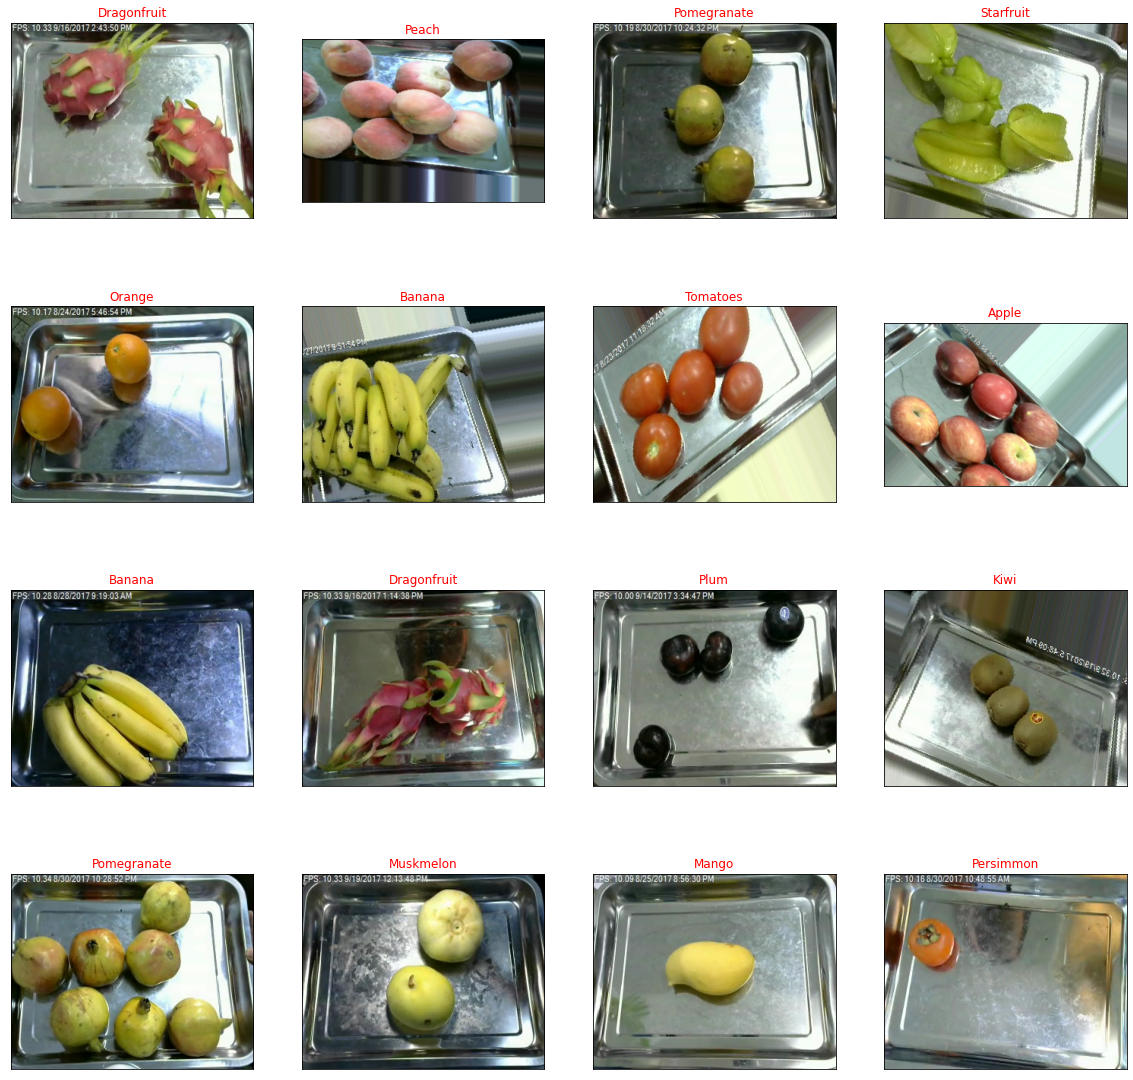

In [8]:
fig = plt.figure(figsize=(20, 5 * 4))
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)
    sample_fruit = random.choice([
        folder for folder in os.listdir(train_dir)
        if os.path.isdir(os.path.join(train_dir, folder))
    ])
    sample_image = os.path.join(
        train_dir, sample_fruit,
        random.choice(os.listdir(os.path.join(train_dir, sample_fruit))))
    img = mpimg.imread(sample_image)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.title(sample_fruit.title(), color="red")
plt.show()
del img

In [9]:
target_size = (200, 200)

In [10]:
augmentation = ImageDataGenerator(
    rescale=1. / 255,
    zoom_range=0.3,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2,
    preprocessing_function=None)

In [11]:
img = load_img(
    sample_image,  
    grayscale=False, 
    color_mode='rgb', 
    target_size=target_size, 
    interpolation='nearest'
    )
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
x.shape

(1, 200, 200, 3)

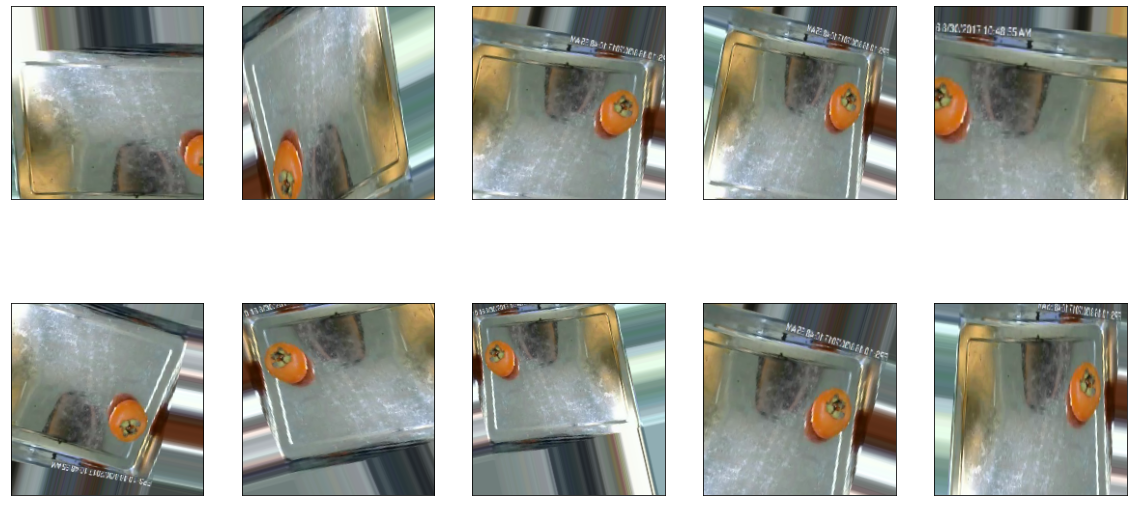

In [12]:
fig = plt.figure(figsize=(20, 5 * 2))
i=0 
for batch in augmentation.flow(x, batch_size=1): 
    ax = fig.add_subplot(2, 5, i + 1)
    imgplot = plt.imshow(array_to_img(batch[0])) 
    plt.xticks([])
    plt.yticks([])
    i += 1 
    if i == 10: 
      break
plt.show()
del img, x, imgplot

In [30]:
train_generator = augmentation.flow_from_directory(
    train_dir,
    target_size=target_size,
    class_mode='categorical',
    batch_size=500,
    shuffle=True,
    seed=42,
    save_prefix='train',
#     save_to_dir='../Image-Classification/augmented/train',
    interpolation='nearest',
    subset='training')

Found 4500 images belonging to 15 classes.


In [31]:
print('{} images for {}'.format(f'{train_generator.n:,}',
                                train_generator.subset))
print('{} input shape'.format(train_generator.image_shape))
print('{} classes'.format(train_generator.num_classes))

4,500 images for training
(200, 200, 3) input shape
15 classes


In [32]:
validation_generator = augmentation.flow_from_directory(
    train_dir,
    target_size=target_size,
    class_mode='categorical',
    batch_size=500,
    shuffle=True,
    seed=42,
    save_prefix='val',
#     save_to_dir='../Image-Classification/augmented/val',
    interpolation='nearest',
    subset='validation')

Found 1125 images belonging to 15 classes.


In [33]:
print('{} images for {}'.format(f'{validation_generator.n:,}',
                                validation_generator.subset))
print('{} input shape'.format(validation_generator.image_shape))
print('{} classes'.format(validation_generator.num_classes))

1,125 images for validation
(200, 200, 3) input shape
15 classes


In [34]:
test_generator = ImageDataGenerator(rescale=1. / 255).flow_from_directory(
    test_dir,
    target_size=target_size,
    class_mode='categorical',
    batch_size=500,
    shuffle=True,
    seed=42,
    save_prefix='test',
#     save_to_dir='../Image-Classification/augmented/test',
    interpolation='nearest')

Found 1875 images belonging to 15 classes.


In [35]:
print('{} images for testing'.format(f'{test_generator.n:,}'))
print('{} input shape'.format(test_generator.image_shape))
print('{} classes'.format(test_generator.num_classes))

1,875 images for testing
(200, 200, 3) input shape
15 classes


In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import metrics, losses, optimizers, callbacks
from keras.backend import clear_session
# from keras.utils import plot_model

In [20]:
input_shape = train_generator.image_shape
input_shape

(200, 200, 3)

In [37]:
model = Sequential(name='model_1')

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=input_shape, 
                 activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=input_shape, 
                 activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=input_shape, 
                 activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=input_shape, 
                 activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=input_shape, 
                 activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=input_shape, 
                 activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=15, activation='softmax'))

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        3692

In [36]:
clear_session()

In [38]:
# plot_model(model, show_shapes=True, show_dtype=True, expand_nested=True)

In [39]:
model.compile(optimizer=optimizers.Adam(),
              loss=losses.CategoricalCrossentropy(),
              metrics=metrics.CategoricalAccuracy())

In [40]:
# model_path= '../Image-Classification/models/'
model_path= '/content/drive/MyDrive/colab/models/'
if not os.path.exists(model_path):
    os.mkdir(model_path)
os.listdir(model_path)

['best model 20210721_1524.h5',
 'best model 20210722_1022.h5',
 'best model 20210722_1131.h5',
 'best model 20210722_1611.h5',
 'best model 20210726_1450.h5']

In [41]:
model_checkpoint = callbacks.ModelCheckpoint(filepath=os.path.join(
    model_path, 'best model {}.h5'.format(
        datetime.datetime.utcnow().strftime("%Y%m%d_%H%M"))),
                                             monitor='val_loss',
                                             verbose=1,
                                             save_best_only=True,
                                             save_freq='epoch')
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True,
)

In [42]:
histories = list()

In [44]:
histories.append(
    model.fit(
        train_generator,
        epochs=100,
        verbose=2,
        callbacks=[model_checkpoint, early_stopping],
        validation_data=validation_generator,
        shuffle=True,
        initial_epoch=0,
        # steps_per_epoch=None,
        # validation_steps=None,
        validation_freq=1,
        )
    )

Epoch 1/100
9/9 - 79s - loss: 2.7096 - categorical_accuracy: 0.0662 - val_loss: 2.7072 - val_categorical_accuracy: 0.0667

Epoch 00001: val_loss improved from inf to 2.70723, saving model to /content/drive/MyDrive/colab/models/best model 20210726_1601.h5
Epoch 2/100
9/9 - 72s - loss: 2.7018 - categorical_accuracy: 0.0642 - val_loss: 2.6535 - val_categorical_accuracy: 0.0658

Epoch 00002: val_loss improved from 2.70723 to 2.65347, saving model to /content/drive/MyDrive/colab/models/best model 20210726_1601.h5
Epoch 3/100
9/9 - 72s - loss: 2.5376 - categorical_accuracy: 0.1022 - val_loss: 2.4496 - val_categorical_accuracy: 0.1413

Epoch 00003: val_loss improved from 2.65347 to 2.44955, saving model to /content/drive/MyDrive/colab/models/best model 20210726_1601.h5
Epoch 4/100
9/9 - 71s - loss: 2.4558 - categorical_accuracy: 0.1391 - val_loss: 2.4410 - val_categorical_accuracy: 0.1422

Epoch 00004: val_loss improved from 2.44955 to 2.44095, saving model to /content/drive/MyDrive/colab/mod

In [45]:
results = model.evaluate(test_generator, return_dict=True)
results

4/4 [==============================] - 524s 174s/step - loss: 0.2924 - categorical_accuracy: 0.8997


{'categorical_accuracy': 0.899733304977417, 'loss': 0.2924068868160248}

In [46]:
def plot_histories(histories, to_plot=['loss', 'val_loss']):
  plt.figure(figsize=(7,5))
  for i in to_plot:
    j = list()
    for history in histories:
      for k in history.history[i]:
            j.append(k)
    epochs = range(1, len(j) + 1)
    color = 'red' if 'val' in i else 'blue'
    marker = '.' if 'val' in i else '_'
    plt.plot(epochs, j, color=color, marker=marker, label=i)

  plt.ylim(top=np.ceil(max(j)))
  plt.legend()
  plt.xlabel('epoch (total = {})'.format(len(epochs)))
  plt.show()


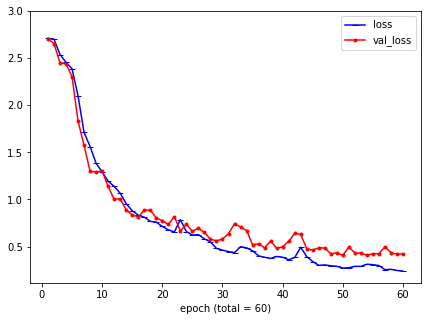

In [47]:
plot_histories(histories)

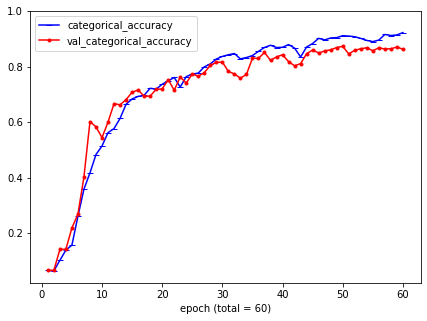

In [48]:
plot_histories(histories, ['categorical_accuracy', 'val_categorical_accuracy'])

In [49]:
histories.append(
    model.fit(
        train_generator,
        epochs=100 + 60,
        verbose=2,
        callbacks=[model_checkpoint, early_stopping],
        validation_data=validation_generator,
        shuffle=True,
        initial_epoch=60,
        # steps_per_epoch=None,
        # validation_steps=None,
        validation_freq=1,
        )
    )

Epoch 61/160
9/9 - 77s - loss: 0.3148 - categorical_accuracy: 0.8893 - val_loss: 0.4428 - val_categorical_accuracy: 0.8667

Epoch 00061: val_loss did not improve from 0.40632
Epoch 62/160
9/9 - 71s - loss: 0.2740 - categorical_accuracy: 0.9118 - val_loss: 0.4714 - val_categorical_accuracy: 0.8480

Epoch 00062: val_loss did not improve from 0.40632
Epoch 63/160
9/9 - 71s - loss: 0.2771 - categorical_accuracy: 0.9073 - val_loss: 0.3888 - val_categorical_accuracy: 0.8818

Epoch 00063: val_loss improved from 0.40632 to 0.38877, saving model to /content/drive/MyDrive/colab/models/best model 20210726_1601.h5
Epoch 64/160
9/9 - 71s - loss: 0.2577 - categorical_accuracy: 0.9111 - val_loss: 0.3984 - val_categorical_accuracy: 0.8764

Epoch 00064: val_loss did not improve from 0.38877
Epoch 65/160
9/9 - 71s - loss: 0.2585 - categorical_accuracy: 0.9160 - val_loss: 0.4804 - val_categorical_accuracy: 0.8578

Epoch 00065: val_loss did not improve from 0.38877
Epoch 66/160
9/9 - 71s - loss: 0.2753 - 

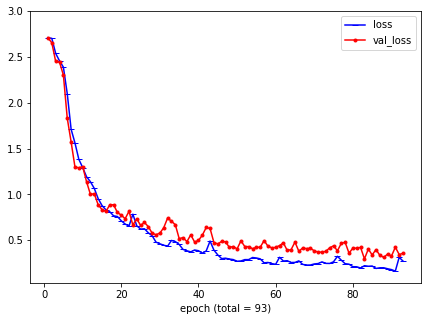

In [50]:
plot_histories(histories)

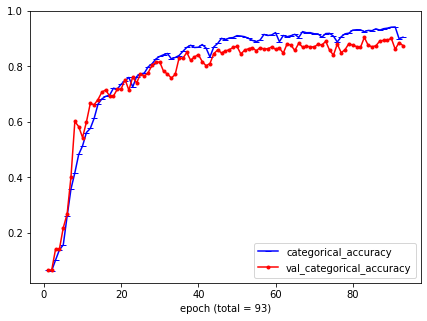

In [51]:
plot_histories(histories, ['categorical_accuracy', 'val_categorical_accuracy'])

In [52]:
histories.append(
    model.fit(
        train_generator,
        epochs=100 + 93,
        verbose=2,
        callbacks=[model_checkpoint, early_stopping],
        validation_data=validation_generator,
        shuffle=True,
        initial_epoch=93,
        # steps_per_epoch=None,
        # validation_steps=None,
        validation_freq=1,
        )
    )

Epoch 94/193
9/9 - 76s - loss: 0.2220 - categorical_accuracy: 0.9247 - val_loss: 0.4166 - val_categorical_accuracy: 0.8516

Epoch 00094: val_loss did not improve from 0.29726
Epoch 95/193
9/9 - 72s - loss: 0.2062 - categorical_accuracy: 0.9302 - val_loss: 0.3443 - val_categorical_accuracy: 0.8844

Epoch 00095: val_loss did not improve from 0.29726
Epoch 96/193
9/9 - 70s - loss: 0.1882 - categorical_accuracy: 0.9371 - val_loss: 0.3382 - val_categorical_accuracy: 0.8933

Epoch 00096: val_loss did not improve from 0.29726
Epoch 97/193
9/9 - 70s - loss: 0.1826 - categorical_accuracy: 0.9424 - val_loss: 0.3282 - val_categorical_accuracy: 0.8951

Epoch 00097: val_loss did not improve from 0.29726
Epoch 98/193
9/9 - 70s - loss: 0.2032 - categorical_accuracy: 0.9329 - val_loss: 0.4431 - val_categorical_accuracy: 0.8667

Epoch 00098: val_loss did not improve from 0.29726
Epoch 99/193
9/9 - 72s - loss: 0.2011 - categorical_accuracy: 0.9264 - val_loss: 0.3410 - val_categorical_accuracy: 0.9022

E

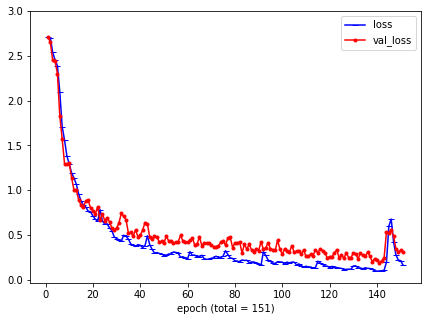

In [53]:
plot_histories(histories)

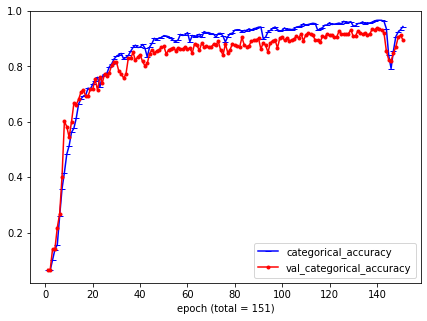

In [54]:
plot_histories(histories, ['categorical_accuracy', 'val_categorical_accuracy'])

In [ ]:
histories.append(
    model.fit(
        train_generator,
        epochs=100 + 152,
        verbose=2,
        callbacks=[model_checkpoint, early_stopping],
        validation_data=validation_generator,
        shuffle=True,
        initial_epoch=152,
        # steps_per_epoch=None,
        # validation_steps=None,
        validation_freq=1,
        )
    )

Epoch 153/252
